# **Analysis for clusters / templates and waveforms, channels, shanks**

## This analysis script is well suited to analyse where the electrodes (silicon probes) are located that detected specific spikes.

load modules

In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

set session name

In [2]:
#name="pk1330-08112021-0101"
#name="pk1330-10112021-0101"
#name="pk1330-16112021-0101"

#name="pk1330-12112021-0101"
#name="pk1331-23112021-0101"
#name="pk1331-23112021-0101_B"

#name="pk1331-24112021-0101"
#name="pk1347-24112021-0101"

#name="pk1331-29112021-0101"
#name="pk1347-01122021-0101"

#name="pk1658-06122021-0102"

#name="pk1331-29112021-0101" # HD cells
#name="pk1658-10122021-0101"

#name="pk1613-12012022-0101"
#name="pk1613-13012022-0101"

#name="pk1615-14012022-0101"

#name="pk1615-15012022-0101"
#name="pk1615-16012022-0101"
#name="pk1615-17012022-0101"
#name="pk1615-18012022-0101_A"

#name="pk1615-18012022-0103"
#name="pk1615-19012022-0105" ## remapping ! (black-white-black)
#name="pk1615-19012022-0102"

#name="pk1615-20012022-0101_B"
#name="pk3865-20012022-0101_B"

#name="pk3865-21012022-0101"

#name="pk1615-21012022-0109"  # five different environments in two different rooms
#name="pk3865-24012022-0109"  # five different environments in two different rooms
#name="pk3865-25012022-0105" # black-white-black in 55b
#name="pk3865-26012022-0101"
#name="pk3865-27012022-0109" # five env + good coverage, good MEC signal, ADN?
#name="pk3864-28012022-0101" # first trial with pk3864
#name="pk3864-29012022-0101" # 
#name="pk3864-30012022-0101" # 
#name="pk3865-31012022-0101"
#name="pk3864-31012022-0109" # first 5 OF trials for pk3864

#name="pk3865-01022022-0101"
#name="pk3865-02022022-0101"

# name="pk3864-04022022-0109" # 

# name="pk3864-05022022-0109" # 
# name="pk3864-07022022-0109" # 
# name="pk3864-09022022-0109" # 

# name="pk3864-10022022-0101"
# name="pk3864-11022022-0101"
# name="pk3864-14022022-0109"
# name="pk3864-15022022-0109"
# name="pk3864-16022022-0101"
# name="pk3855-21022022-0101"
name="pk3855-24022022-0101"

Check the path

In [3]:
import os

basedir = "/adata/electro"
subject, session = name.split("-",1)
path = basedir+"/"+subject+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", subject) # directory = mouse subject name
print("Session:", session)
print("Name:", name, ",", fname)
print("")
print("Path:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/pk3855/pk3855-24022022-0101/
Mouse: pk3855
Session: 24022022-0101
Name: pk3855-24022022-0101 , pk3855-24022022-0101

Path: OK


## Get a Session object

Check the files

In [4]:
ses = Kilosort_session(name=fname, path=path)
ses.load_parameters_from_files(ignore_params=True)  # ignore_params if kilosort has not been executed so far
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = pk3855-24022022-0101
path = /adata/electro/pk3855/pk3855-24022022-0101
subject = pk3855
session_dat_time = 2022-02-24 01:01:00
fileBase = /adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101
file_names = {'par': '/adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101.par', 'desen': '/adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101.desen', 'desel': '/adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101.desel', 'sampling_rate': '/adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101.sampling_rate_dat', 'stimulation': '/adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101.stimulation', 'px_per_cm': '/adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101.px_per_cm', 'setup': '/adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101.setup', 'environmentFamiliarity': '/adata/electro/pk3855/pk3855-24022022-0101/pk3855-24022022-0101.environmentFamiliarity', 'params':

## Load spikes

In [5]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
print("stl.clu_ids", ",", "len =", len(stl.clu_ids))
print(stl.clu_ids)
cg = Cell_group(stl)

stl.clu_ids , len = 25
[ 2  3 11 12 13 15 17 21 23 25 26 28 29 31 32 36 47 48 71 72 75 79 80 81
 83]


In [6]:
# from tabulate import tabulate

print("Found", len(cg.neuron_list), "good clusters (neurons)")

# for i,(clu_id, spike_time) in enumerate(zip(stl.clu_ids, stl.spike_times)):
#     print("#",i,", id =",clu_id, ", spikes:",len(spike_time))
for i,n in enumerate(cg.neuron_list):
    #  n_spikes = len(n.spike_train.st)
    print("#",i,", id =",n.name, ", spikes:",n.spike_train.n_spikes(),", mean firing rate =",round(n.spike_train.mean_firing_rate(),2))

Found 25 good clusters (neurons)
# 0 , id = 2 , spikes: 16083 , mean firing rate = 12.8
# 1 , id = 3 , spikes: 12520 , mean firing rate = 9.96
# 2 , id = 11 , spikes: 18958 , mean firing rate = 15.09
# 3 , id = 12 , spikes: 11011 , mean firing rate = 8.76
# 4 , id = 13 , spikes: 25767 , mean firing rate = 20.5
# 5 , id = 15 , spikes: 32059 , mean firing rate = 25.51
# 6 , id = 17 , spikes: 36361 , mean firing rate = 28.93
# 7 , id = 21 , spikes: 15896 , mean firing rate = 12.65
# 8 , id = 23 , spikes: 17424 , mean firing rate = 13.86
# 9 , id = 25 , spikes: 16063 , mean firing rate = 12.78
# 10 , id = 26 , spikes: 25206 , mean firing rate = 20.06
# 11 , id = 28 , spikes: 35596 , mean firing rate = 28.32
# 12 , id = 29 , spikes: 20798 , mean firing rate = 16.55
# 13 , id = 31 , spikes: 16610 , mean firing rate = 13.22
# 14 , id = 32 , spikes: 10047 , mean firing rate = 8.0
# 15 , id = 36 , spikes: 14880 , mean firing rate = 11.84
# 16 , id = 47 , spikes: 24092 , mean firing rate = 19.17

## Load the waveforms

Set the waveform and channel information from the session template file.

In [7]:
cg.set_info_from_session(ses, maxchannels=5)

Templates: 77 , timepoints: 82 , Channels: 64
Loaded templates-clusters-map, spikes: 511178 , clusters: 68
Init shanks: 8


For each cluster, print the active channels where the spikes were detected, and the corresponding brain area.

In [8]:
for n in cg.neuron_list:
    print(n.name, n.channels, n.brain_area, n.cluster_decomposed) 

2 [ 1  3  0  8 16] ['adn'] {2: 1.0}
3 [2 5 7 0 1] ['adn'] {3: 1.0}
11 [4 2 7 0 3] ['adn'] {11: 1.0}
12 [5 4 3 6 7] ['adn'] {12: 1.0}
13 [6 7 4 2 5] ['adn'] {13: 1.0}
15 [7 6 3 1 0] ['adn'] {15: 1.0}
17 [ 9  8 11 13  1] ['adn'] {17: 1.0}
21 [10 11  8 13 12] ['adn'] {21: 1.0}
23 [11  9 13  1 12] ['adn'] {23: 1.0}
25 [12 15 11 13 10] ['adn'] {25: 1.0}
26 [13 12 15 10  8] ['adn'] {26: 1.0}
28 [15 14 13 11 12] ['adn'] {28: 1.0}
29 [17 16 24 26 21] ['adn'] {29: 1.0}
31 [20 21 23 17 24] ['adn'] {31: 1.0}
32 [22 23 20 19 17] ['adn'] {32: 1.0}
36 [26 17 19 30 21] ['adn'] {36: 1.0}
47 [38 39 36 37 34] ['mec'] {47: 1.0}
48 [39 38 45 52 25] ['adn', 'mec'] {48: 1.0}
71 [4 6 0 3 7] ['adn'] {71: 1.0}
72 [5 4 7 3 6] ['adn'] {72: 1.0}
75 [12 15 10 13 11] ['adn'] {75: 1.0}
79 [36 34 38 44 23] ['adn', 'mec'] {43: 0.10112359550561797, 44: 0.3258426966292135, 45: 0.1947565543071161, 46: 0.3782771535580524}
80 [ 5  3 15  1  6] ['adn'] {9: 0.012183865608270261, 69: 0.9878161343917298}
81 [2 0 4 3 1] ['adn'] 

In [9]:
unique, counts = np.unique([ '/'.join(n.brain_area) for n in cg.neuron_list ] , return_counts=True )

for u,c in zip(unique, counts):
    print(u,":",c)

adn : 22
adn/mec : 2
mec : 1


In [10]:
ses.clusterids

array([ 0,  1,  2,  3,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 75, 76, 79, 80, 81, 83],
      dtype=int32)

Plot the waveforms for one arbitrary cluster (neuron) on the channels of its highest peak-to-peak amplitudes of waveform.

In [11]:
#cluster = 16 # choose any cluster
cluster = stl.clu_ids[0] # select the first good cluster = int(cg.neuron_list[0].name)
channels = ses.get_channels_from_cluster(cluster, 12)
print("The most significant channels for cluster", cluster,":")
print(channels)

The most significant channels for cluster 2 :
[ 1  3  0  8 16 13  6  5  7  2 12  9]


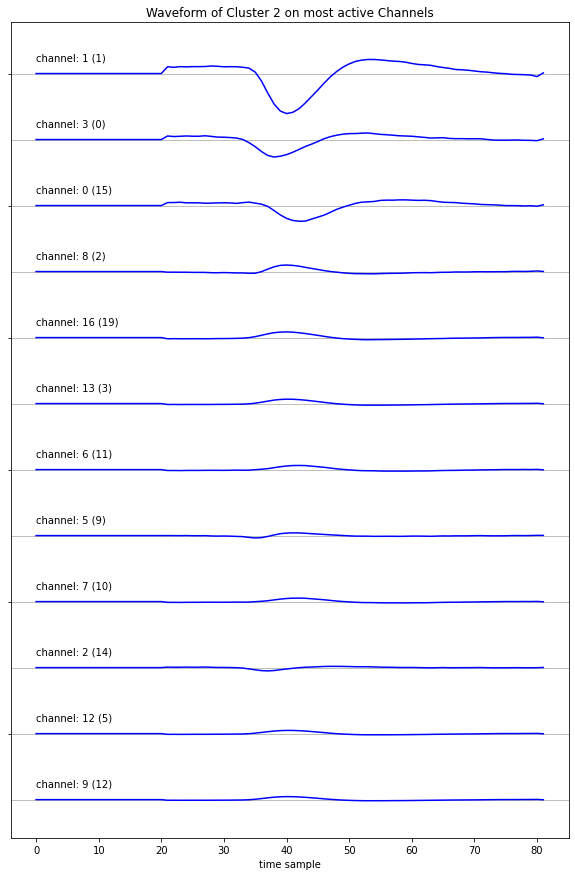

In [12]:
# plot on selected channels (in rows, using offset, so no y-axis)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    
    channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel) # get_waveform (of template / of cluster)
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  
plt.title("Waveform of Cluster "+str(cluster)+" on most active Channels")
plt.show()

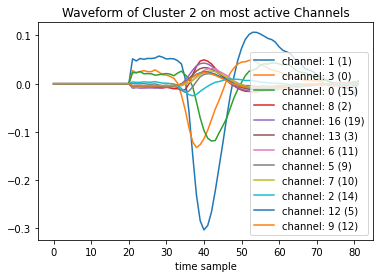

In [34]:
# plot on selected channels (in one plot, with meaningful y-axis)

for i,channel in enumerate(channels):
    
    channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel) # get_waveform (of template / of cluster)
    
    # plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform, label=label)
plt.xlabel("time sample")
plt.legend()
plt.title("Waveform of Cluster "+str(cluster)+" on most active Channels")
plt.show()

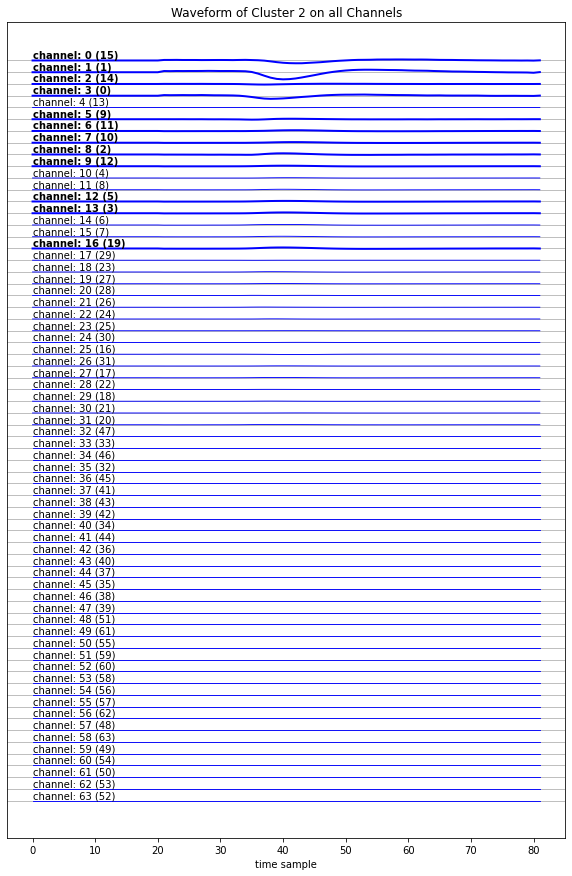

In [13]:
# plot waveform on all channels (and highlight the most active ones)

channels_all = range(ses.wv_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels_all):
    channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel)
    
    plot_style = [2.,'bold'] if channel in channels else [.9, 'normal']
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue" , lw=plot_style[0])
    plt.text( s= label , x=0, y=-i*.5 +.1 , weight=plot_style[1])
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  # remove the tick labels
ax.set(ylabel=None)  # remove the y-axis label
ax.tick_params(left=False)  # remove the ticks

plt.title("Waveform of Cluster "+str(cluster)+" on all Channels")
plt.show()

## Channel configuration (position and shank mapping)

In [14]:
print("electrodes:", ses.desel)

electrodes: ['adn', 'adn', 'adn', 'adn', 'mec', 'mec', 'mec', 'mec']


channel: 0  ( 15 ), position: [ 1. 65.]
channel: 1  ( 1 ), position: [ 1. 64.]
channel: 2  ( 14 ), position: [ 1. 63.]
channel: 3  ( 0 ), position: [ 1. 62.]
channel: 4  ( 13 ), position: [ 1. 61.]
channel: 5  ( 9 ), position: [ 1. 60.]
channel: 6  ( 11 ), position: [ 1. 59.]
channel: 7  ( 10 ), position: [ 1. 58.]
channel: 8  ( 2 ), position: [ 2. 57.]
channel: 9  ( 12 ), position: [ 2. 56.]
channel: 10  ( 4 ), position: [ 2. 55.]
channel: 11  ( 8 ), position: [ 2. 54.]
channel: 12  ( 5 ), position: [ 2. 53.]
channel: 13  ( 3 ), position: [ 2. 52.]
channel: 14  ( 6 ), position: [ 2. 51.]
channel: 15  ( 7 ), position: [ 2. 50.]
channel: 16  ( 19 ), position: [ 3. 49.]
channel: 17  ( 29 ), position: [ 3. 48.]
channel: 18  ( 23 ), position: [ 3. 47.]
channel: 19  ( 27 ), position: [ 3. 46.]
channel: 20  ( 28 ), position: [ 3. 45.]
channel: 21  ( 26 ), position: [ 3. 44.]
channel: 22  ( 24 ), position: [ 3. 43.]
channel: 23  ( 25 ), position: [ 3. 42.]
channel: 24  ( 30 ), position: [ 4. 

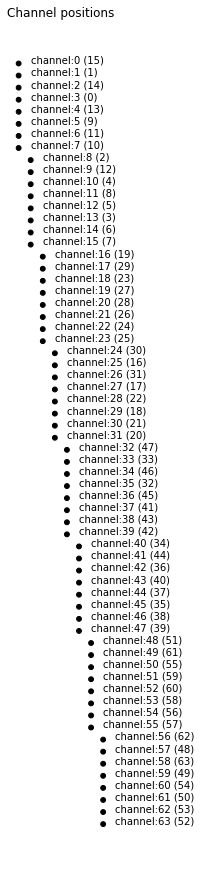

In [15]:
fig, ax = plt.subplots(figsize=(9,12), constrained_layout=True)

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):
    print("channel:",channel," (",ses.channel_map[channel],"), position:",position)
        
    circle = plt.Circle((position[0], position[1]), 0.2, color="black")
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True)
plt.title("Channel positions")
#plt.tight_layout()
plt.show()

draw this for the specific cluster showing the significant channels

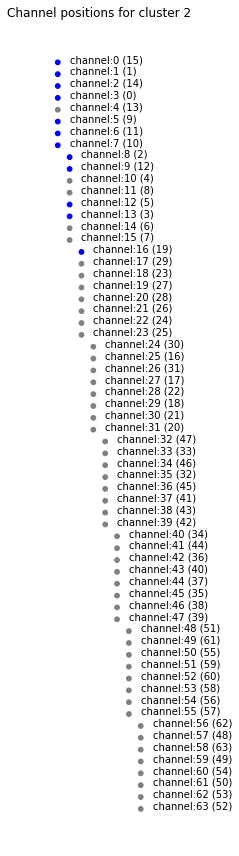

In [16]:
fig, ax = plt.subplots(figsize=(9,12))

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):        
    color = 'blue' if channel in channels else 'gray'
    
    circle = plt.Circle((position[0], position[1]), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    
ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True) 
plt.title("Channel positions for cluster "+str(cluster))
plt.tight_layout()
plt.show()

Reduce this to shanks (multiple channels are on one shank), and multiple shanks are in one brain region.
One neuron shall be unambigously defined on only one brain region. 

In [17]:
print("Shanks:", ses.shanks_all)

Shanks: [1. 2. 3. 4. 5. 6. 7. 8.]


In [18]:
shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)

In [19]:
if len(electrodes)!=1:
    print("Error, neuron was active on channels that belong to different brain regions!")

shank 1 (adn) is active
shank 2 (adn) is active
shank 3 (adn) is active
shank 4 (adn) is not detecting this neuron
shank 5 (mec) is not detecting this neuron
shank 6 (mec) is not detecting this neuron
shank 7 (mec) is not detecting this neuron
shank 8 (mec) is not detecting this neuron


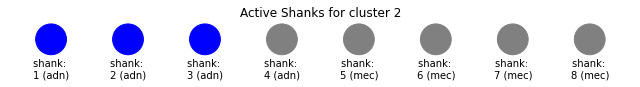

Brain region for neuron 2 is adn


In [20]:
fig, ax = plt.subplots(figsize=(9,3))

for i, (shank, active, el) in enumerate(zip(ses.shanks_all, shanks_arr, ses.desel)):
    print("shank",str(int(shank)),"("+el+")","is","active" if active else "not detecting this neuron")
    
    color = 'blue' if active else 'gray'
    
    circle = plt.Circle((i,0), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=i, y=-.5, s="shank: \n"+str(int(shank))+" ("+el+")", ha='center')

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
ax.autoscale(enable=True) 
plt.title("Active Shanks for cluster "+str(cluster))
plt.tight_layout()
plt.show()

print("Brain region for neuron",cluster,"is",electrodes[0])

### Decompose Cluster into Templates

The post-processing of phy might have changed (by split/merge) the clusters (initially equal to templates). Because we are interested in the clusters (= a neuon), we need to decompose the clusters into templates.
- [Phy spike_templates / spike_clusters](https://phy.readthedocs.io/en/latest/sorting_user_guide/#concepts)
- [Phy terminology - Clusters/Templates](https://github.com/cortex-lab/phy/blob/master/docs/terminology.md#cluster)

In [21]:
print("all clusters:", len(ses.clusterids))

all clusters: 68


In [22]:
good_clusters = [ int(n.name) for n in cg.neuron_list ]
print("good_clusters:", len(good_clusters))

good_clusters: 25


* Cluster 0


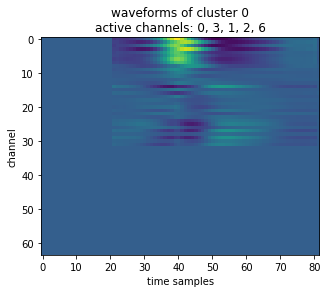

good one: False
decomposed template weights: {0: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 1


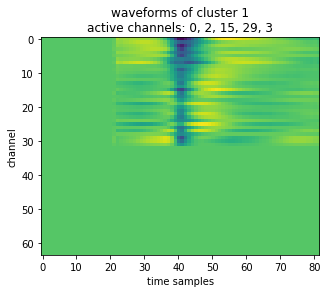

good one: False
decomposed template weights: {1: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 2


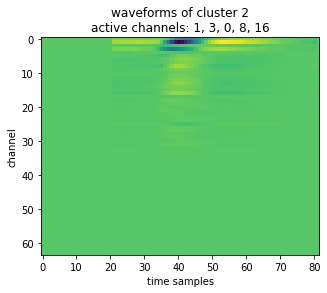

good one: True
decomposed template weights: {2: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 3


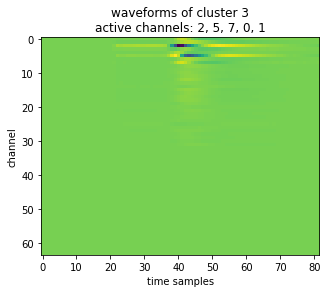

good one: True
decomposed template weights: {3: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 6


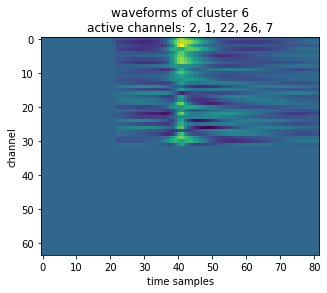

good one: False
decomposed template weights: {6: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 7


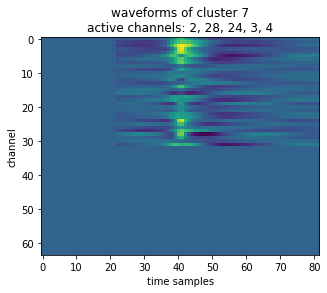

good one: False
decomposed template weights: {7: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 8


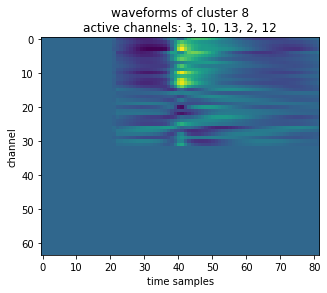

good one: False
decomposed template weights: {8: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 10


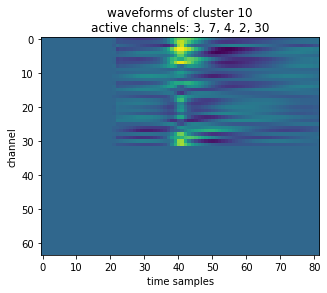

good one: False
decomposed template weights: {10: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 11


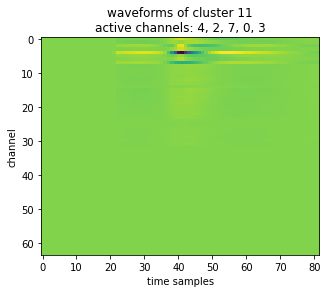

good one: True
decomposed template weights: {11: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 12


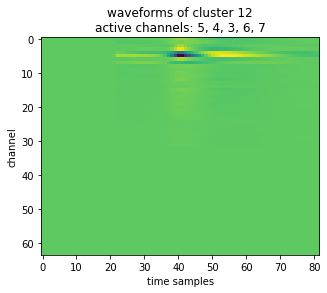

good one: True
decomposed template weights: {12: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 13


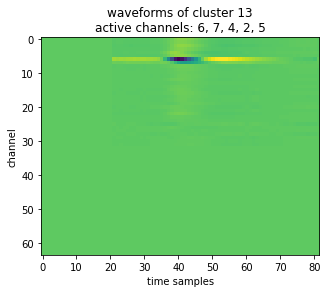

good one: True
decomposed template weights: {13: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 14


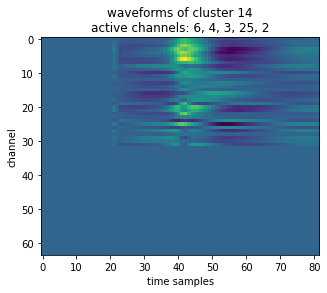

good one: False
decomposed template weights: {14: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 15


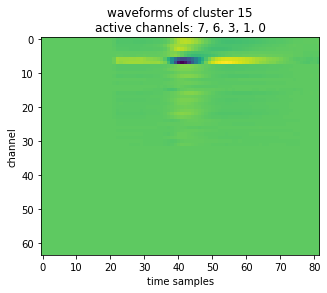

good one: True
decomposed template weights: {15: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 17


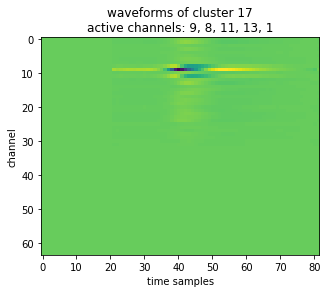

good one: True
decomposed template weights: {17: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 18


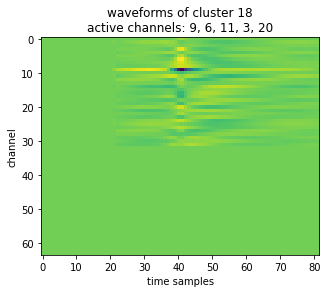

good one: False
decomposed template weights: {18: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 19


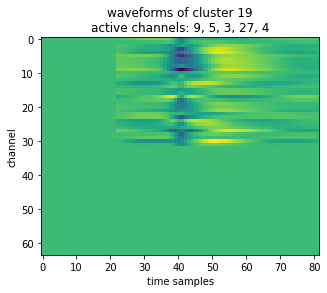

good one: False
decomposed template weights: {19: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 21


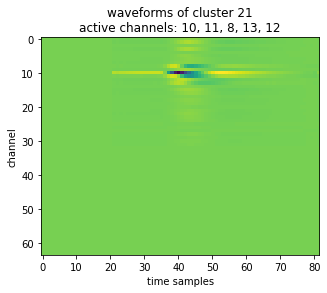

good one: True
decomposed template weights: {21: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 23


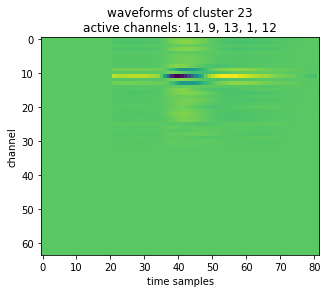

good one: True
decomposed template weights: {23: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 24


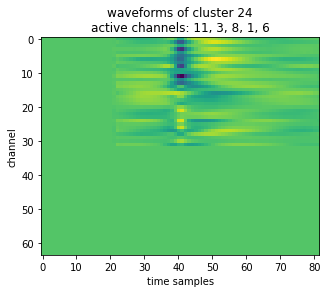

good one: False
decomposed template weights: {24: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 25


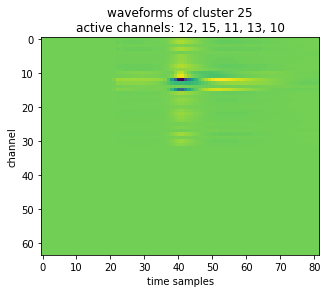

good one: True
decomposed template weights: {25: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 26


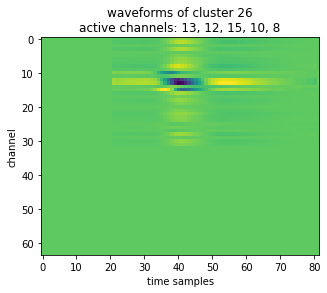

good one: True
decomposed template weights: {26: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 27


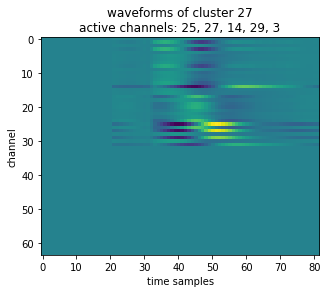

good one: False
decomposed template weights: {27: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 28


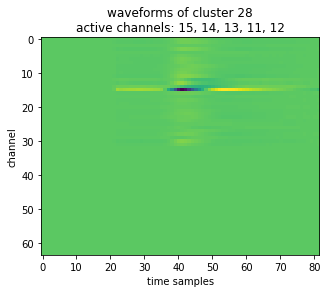

good one: True
decomposed template weights: {28: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 29


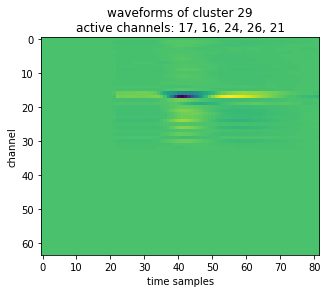

good one: True
decomposed template weights: {29: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 30


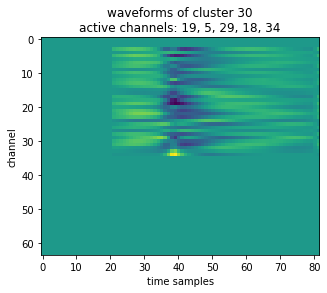

good one: False
decomposed template weights: {30: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 31


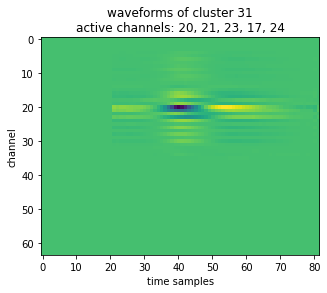

good one: True
decomposed template weights: {31: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 32


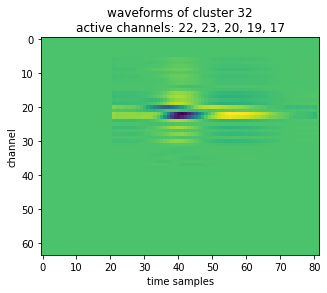

good one: True
decomposed template weights: {32: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 33


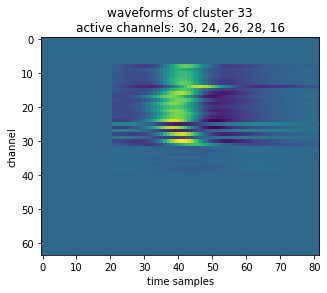

good one: False
decomposed template weights: {33: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 34


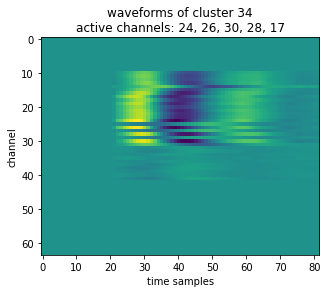

good one: False
decomposed template weights: {34: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 35


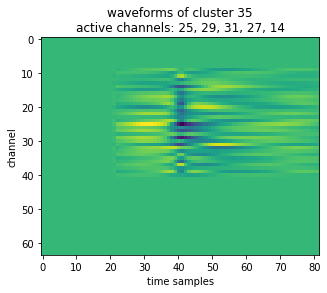

good one: False
decomposed template weights: {35: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 36


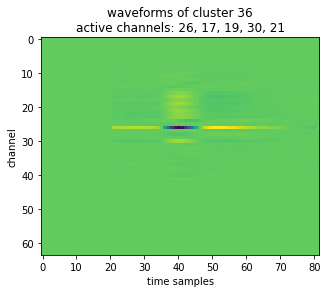

good one: True
decomposed template weights: {36: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 37


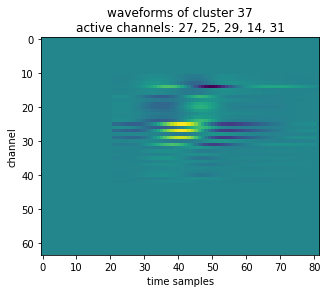

good one: False
decomposed template weights: {37: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 38


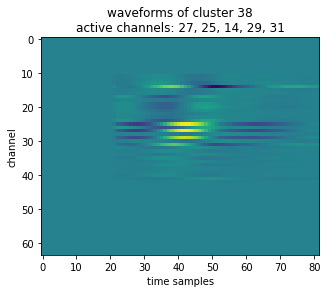

good one: False
decomposed template weights: {38: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 39


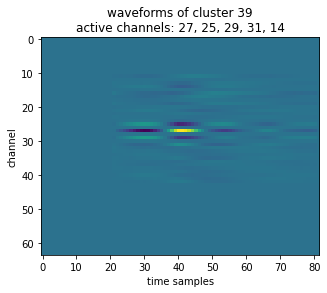

good one: False
decomposed template weights: {39: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 40


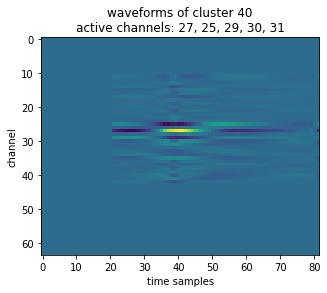

good one: False
decomposed template weights: {40: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 41


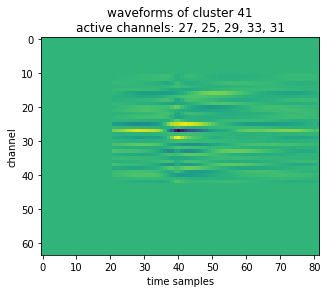

good one: False
decomposed template weights: {41: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 42


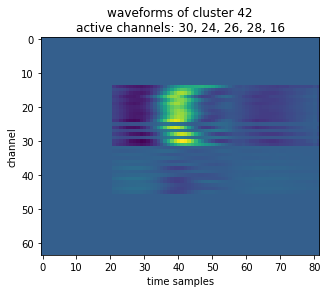

good one: False
decomposed template weights: {42: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 47


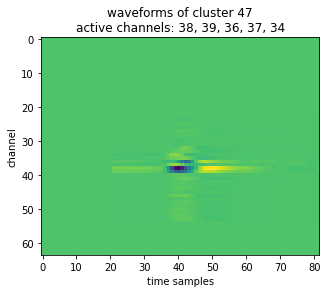

good one: True
decomposed template weights: {47: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 48


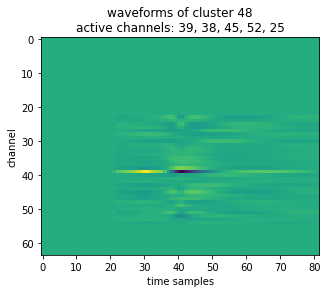

good one: True
decomposed template weights: {48: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 49


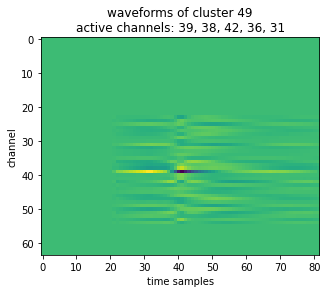

good one: False
decomposed template weights: {49: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 50


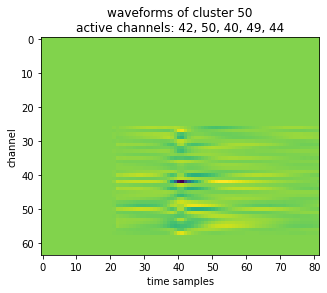

good one: False
decomposed template weights: {50: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 51


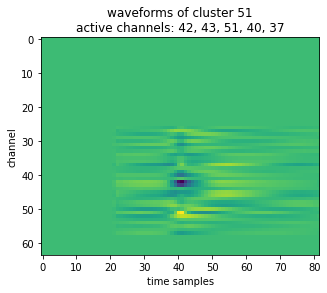

good one: False
decomposed template weights: {51: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 52


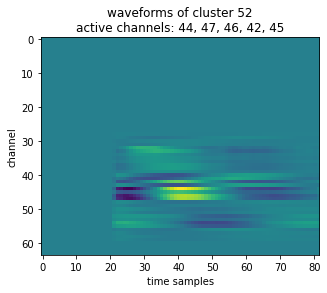

good one: False
decomposed template weights: {52: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 53


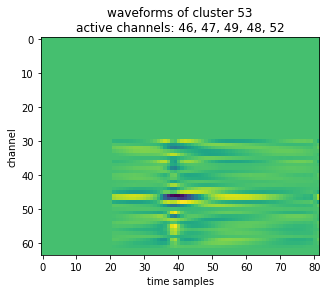

good one: False
decomposed template weights: {53: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 54


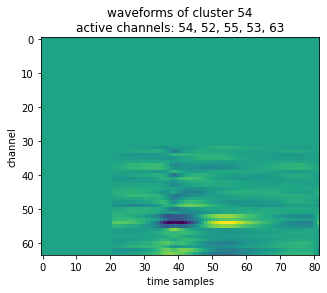

good one: False
decomposed template weights: {54: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 55


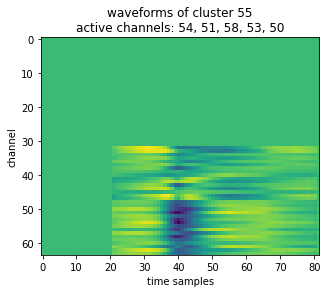

good one: False
decomposed template weights: {55: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 56


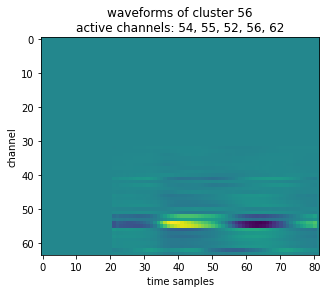

good one: False
decomposed template weights: {56: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 57


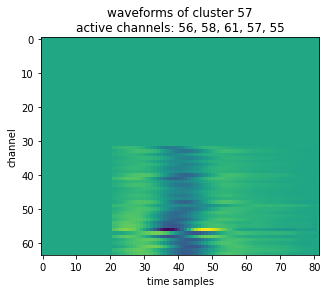

good one: False
decomposed template weights: {57: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 58


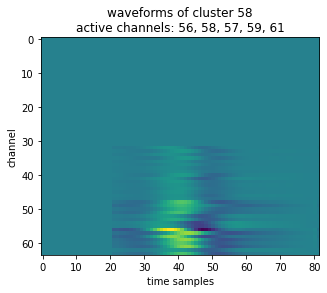

good one: False
decomposed template weights: {58: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 59


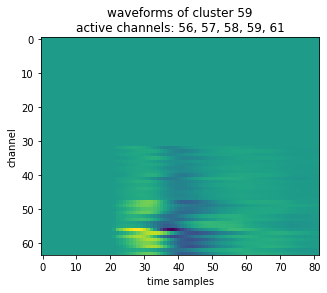

good one: False
decomposed template weights: {59: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 60


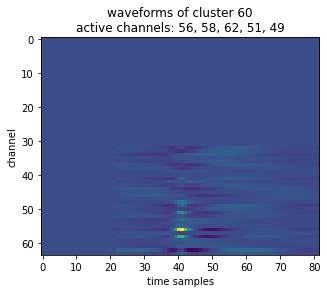

good one: False
decomposed template weights: {60: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 61


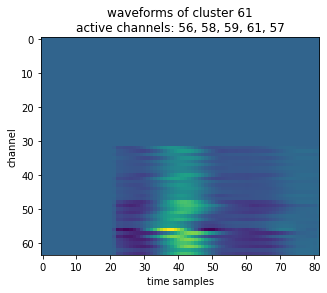

good one: False
decomposed template weights: {61: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 62


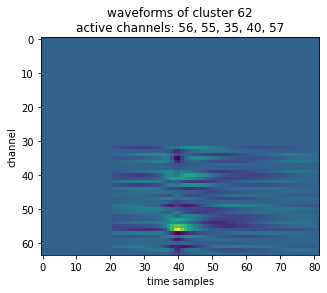

good one: False
decomposed template weights: {62: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 63


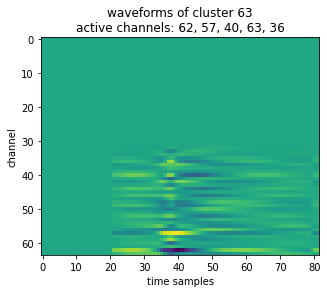

good one: False
decomposed template weights: {63: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 64


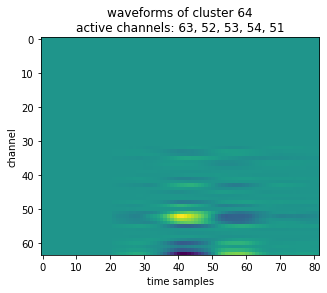

good one: False
decomposed template weights: {64: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 65


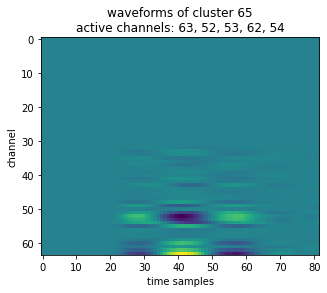

good one: False
decomposed template weights: {65: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 66


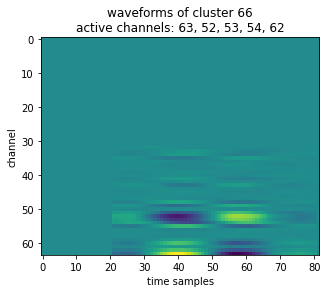

good one: False
decomposed template weights: {66: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 67


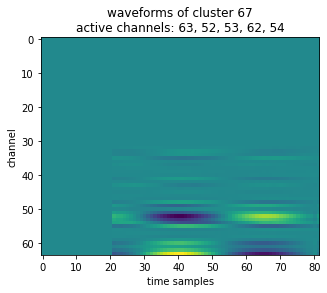

good one: False
decomposed template weights: {67: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 68


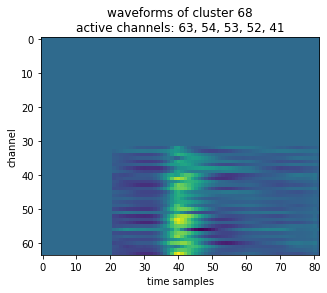

good one: False
decomposed template weights: {68: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 70


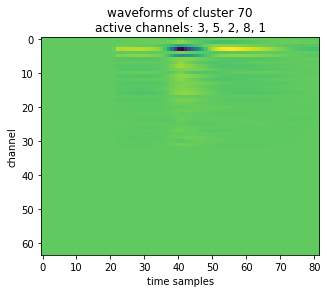

good one: False
decomposed template weights: {70: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 71


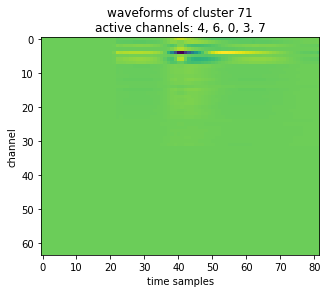

good one: True
decomposed template weights: {71: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 72


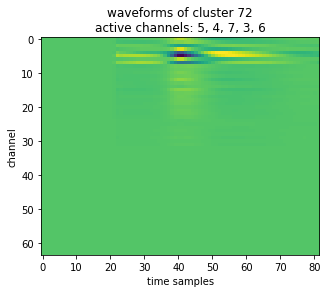

good one: True
decomposed template weights: {72: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 75


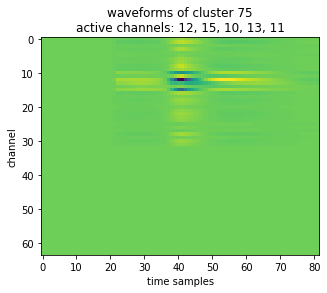

good one: True
decomposed template weights: {75: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 76


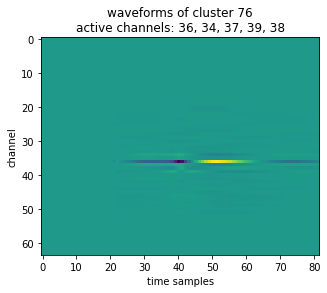

good one: False
decomposed template weights: {76: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 79


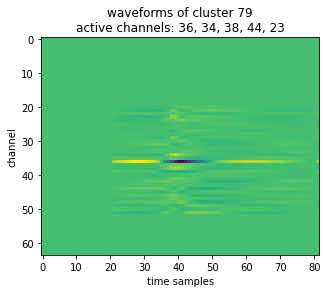

good one: True
decomposed template weights: {43: 0.10112359550561797, 44: 0.3258426966292135, 45: 0.1947565543071161, 46: 0.3782771535580524}
cluster is from merged templates:
- template 43


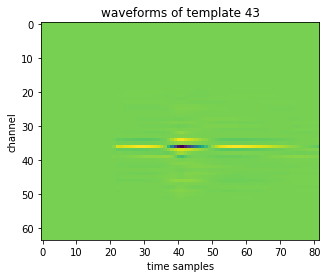

- template 44


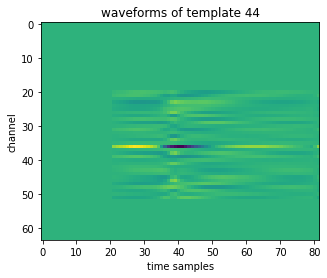

- template 45


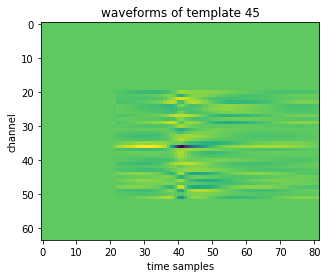

- template 46


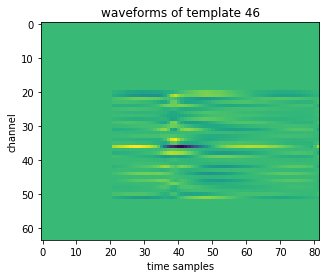

-----------------------

* Cluster 80


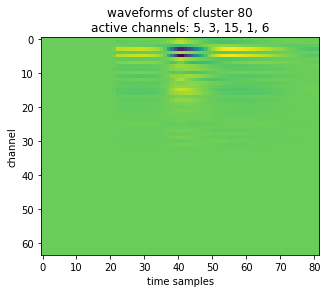

good one: True
decomposed template weights: {9: 0.012183865608270261, 69: 0.9878161343917298}
cluster is from merged templates:
- template 9


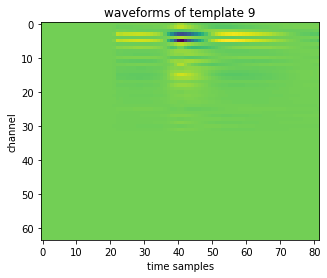

- template 69


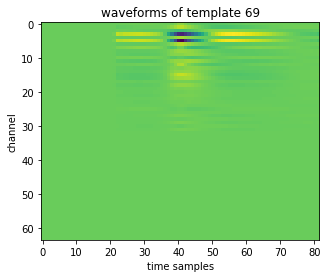

-----------------------

* Cluster 81


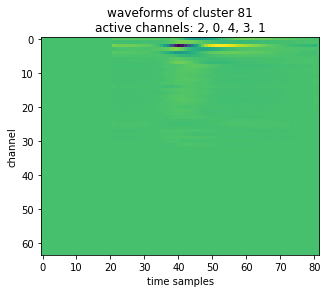

good one: True
decomposed template weights: {4: 0.9830241708825183, 5: 0.01697582911748173}
cluster is from merged templates:
- template 4


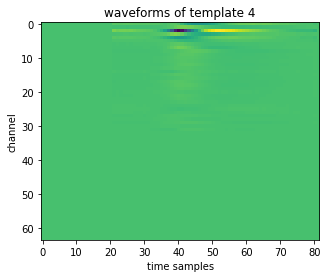

- template 5


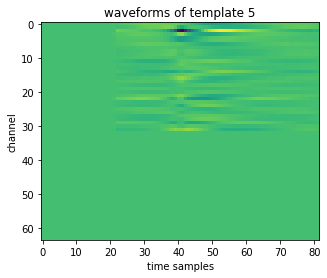

-----------------------

* Cluster 83


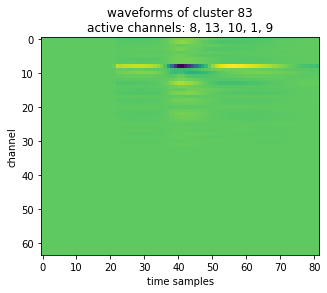

good one: True
decomposed template weights: {16: 0.027149321266968326, 73: 0.9443090845805778, 74: 0.02854159415245388}
cluster is from merged templates:
- template 16


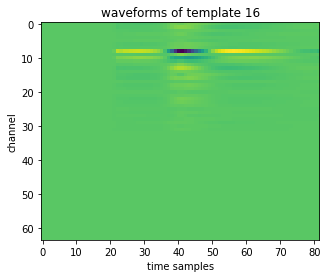

- template 73


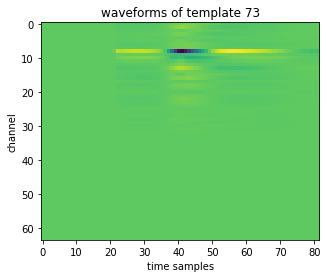

- template 74


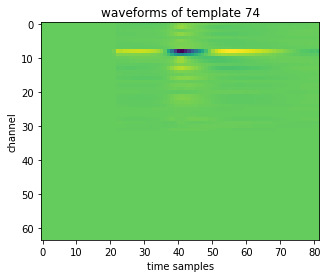

-----------------------



In [32]:
for c in ses.clusterids:
    print("* Cluster",c)
    
    cluster_waveforms = ses.get_waveforms_from_cluster(c)
    high_channels = ses.get_channels_from_waveforms(cluster_waveforms) # waveform by cluster
    plt.imshow(cluster_waveforms.T)
    plt.xlabel("time samples")
    plt.ylabel("channel")
    plt.title("waveforms of cluster "+str(c)+"\n"+"active channels: "+', '.join([str(ch) for ch in high_channels]))
    plt.show()
    
    print("good one:",c in good_clusters)
    
    unique, weights = ses.decompose_cluster(c)
    print("decomposed template weights:",dict(zip(unique, weights)))
    if len(unique)==1:
        print("cluster is from only one template (no merge)")
        if unique[0]==c:
            print("cluster coincides with template (no split)")
        else:
            print("cluster is from split template")
    else:
        print("cluster is from merged templates:")
        for t in unique:
            print("- template",t)
            template_waveforms = ses.get_waveforms(t) # waveform by template
            plt.imshow(template_waveforms.T)
            plt.title("waveforms of template "+str(t))
            plt.xlabel("time samples")
            plt.ylabel("channel")
            plt.show()
    
    print("-----------------------")
    print("")